# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'q={city}&appid=c2e33234eb9fc22dc30337f09bebc67a&units=metric')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()
        
#         Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | nasir
Processing Record 3 of Set 1 | chui
Processing Record 4 of Set 1 | 'ain benian
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | seosan
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | tammela
Processing Record 22 of Se

Processing Record 38 of Set 4 | loveland
Processing Record 39 of Set 4 | qingnian
Processing Record 40 of Set 4 | weno
Processing Record 41 of Set 4 | laikit, laikit ii (dimembe)
Processing Record 42 of Set 4 | iskateley
Processing Record 43 of Set 4 | diyadin
Processing Record 44 of Set 4 | zhicheng
Processing Record 45 of Set 4 | takoradi
Processing Record 46 of Set 4 | yatou
Processing Record 47 of Set 4 | antofagasta
Processing Record 48 of Set 4 | revda
Processing Record 49 of Set 4 | carbonear
Processing Record 0 of Set 5 | mutsu
Processing Record 1 of Set 5 | port moresby
Processing Record 2 of Set 5 | el abiodh sidi cheikh
Processing Record 3 of Set 5 | yarmouth
Processing Record 4 of Set 5 | hondo
Processing Record 5 of Set 5 | uliastay
Processing Record 6 of Set 5 | sarikamis
Processing Record 7 of Set 5 | undurkhaan
Processing Record 8 of Set 5 | jieshi
Processing Record 9 of Set 5 | berdigestyakh
Processing Record 10 of Set 5 | namibe
Processing Record 11 of Set 5 | nova xa

Processing Record 34 of Set 8 | crane
Processing Record 35 of Set 8 | peterhead
Processing Record 36 of Set 8 | vilyuchinsk
Processing Record 37 of Set 8 | nawabganj
Processing Record 38 of Set 8 | cable beach
City not found. Skipping...
Processing Record 39 of Set 8 | abepura
Processing Record 40 of Set 8 | luderitz
Processing Record 41 of Set 8 | chadron
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | tralee
Processing Record 44 of Set 8 | watford city
Processing Record 45 of Set 8 | leiston
Processing Record 46 of Set 8 | przasnysz
Processing Record 47 of Set 8 | sandnessjoen
Processing Record 48 of Set 8 | cockburn town
Processing Record 49 of Set 8 | gdov
Processing Record 0 of Set 9 | atvidaberg
Processing Record 1 of Set 9 | klyuchi
Processing Record 2 of Set 9 | hadibu
Processing Record 3 of Set 9 | benghazi
Processing Record 4 of Set 9 | leeton
Processing Record 5 of Set 9 | grande prairie
Processing Record 6 of Set 9 | verkhniy baskunchak
Processi

Processing Record 22 of Set 12 | viqueque
Processing Record 23 of Set 12 | banda aceh
Processing Record 24 of Set 12 | bilajer
Processing Record 25 of Set 12 | howrah
Processing Record 26 of Set 12 | manaure
Processing Record 27 of Set 12 | ghat
Processing Record 28 of Set 12 | murzuq
Processing Record 29 of Set 12 | port blair
Processing Record 30 of Set 12 | bikenibeu village
Processing Record 31 of Set 12 | roma
Processing Record 32 of Set 12 | marudi
City not found. Skipping...
Processing Record 33 of Set 12 | gornopravdinsk
Processing Record 34 of Set 12 | san carlos centro
Processing Record 35 of Set 12 | prince albert
Processing Record 36 of Set 12 | puerto leguizamo
Processing Record 37 of Set 12 | ugoofaaru
Processing Record 38 of Set 12 | porto recanati
Processing Record 39 of Set 12 | moab
Processing Record 40 of Set 12 | juneau
Processing Record 41 of Set 12 | polyarnyy
Processing Record 42 of Set 12 | aden
Processing Record 43 of Set 12 | brookings
Processing Record 44 of 

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-17.90,84,94,2.05,RU,1683495219
1,nasir,15.5894,32.5634,33.81,10,4,7.22,SD,1683495597
2,chui,-33.6971,-53.4616,16.30,93,100,2.66,UY,1683495597
3,'ain benian,36.8028,2.9219,18.03,88,21,0.89,DZ,1683495597
4,grytviken,-54.2811,-36.5092,1.76,90,89,9.71,GS,1683495597


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-17.90,84,94,2.05,RU,1683495219
1,nasir,15.5894,32.5634,33.81,10,4,7.22,SD,1683495597
2,chui,-33.6971,-53.4616,16.30,93,100,2.66,UY,1683495597
3,'ain benian,36.8028,2.9219,18.03,88,21,0.89,DZ,1683495597
4,grytviken,-54.2811,-36.5092,1.76,90,89,9.71,GS,1683495597


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

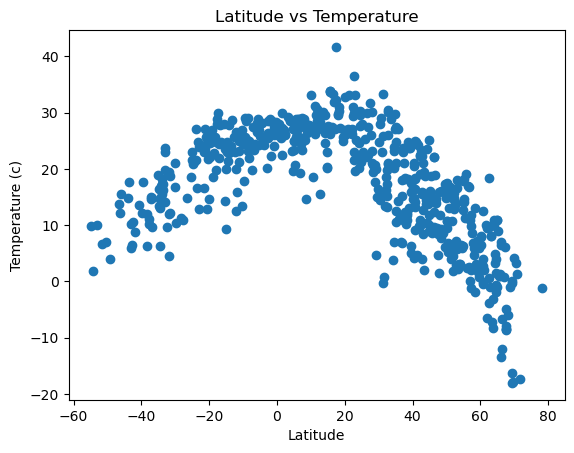

In [32]:
# Build scatter plot for latitude vs. temperature
temp_x_axis=city_data_df['Lat']
temp_y_axis=city_data_df['Max Temp']
plt.scatter(temp_x_axis,temp_y_axis)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (c)')
plt.title('Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

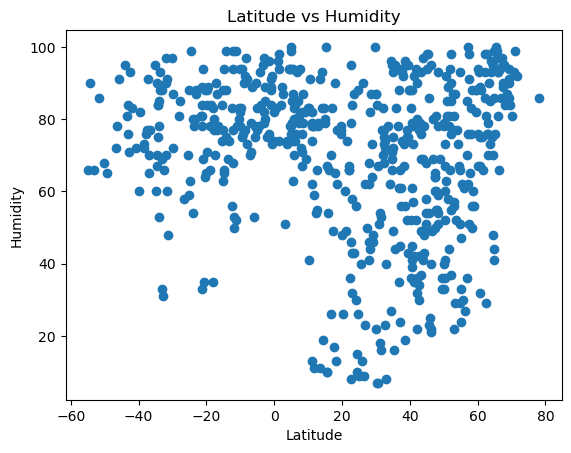

In [33]:
# Build the scatter plots for latitude vs. humidity
hum_x_axis=city_data_df['Lat']
hum_y_axis=city_data_df['Humidity']
plt.scatter(hum_x_axis,hum_y_axis)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

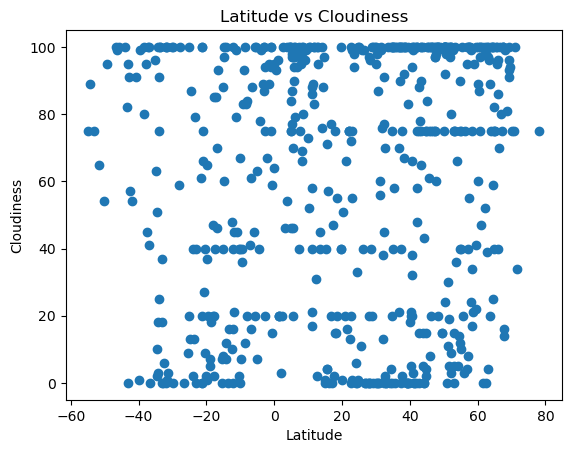

In [34]:
# Build the scatter plots for latitude vs. cloudiness
cloud_x_axis=city_data_df['Lat']
cloud_y_axis=city_data_df['Cloudiness']
plt.scatter(cloud_x_axis,cloud_y_axis)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

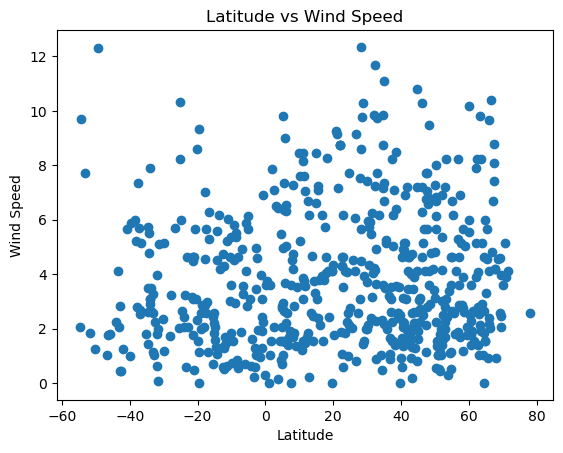

In [35]:
# Build the scatter plots for latitude vs. wind speed
wind_x_axis=city_data_df['Lat']
wind_y_axis=city_data_df['Wind Speed']
plt.scatter(wind_x_axis,wind_y_axis)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
(temp_slope,temp_int,temp_r,temp_p,temp_stderr)=linregress(temp_x_axis,temp_y_axis)

(hum_slope,hum_int,hum_r,hum_p,hum_stderr)=linregress(hum_x_axis,hum_y_axis)

(cloud_slope,cloud_int,cloud_r,cloud_p,cloud_stderr)=linregress(cloud_x_axis,cloud_y_axis)

(wind_slope,wind_int,wind_r,wind_p,wind_stderr)=linregress(wind_x_axis,wind_y_axis)

In [38]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-17.90,84,94,2.05,RU,1683495219
1,nasir,15.5894,32.5634,33.81,10,4,7.22,SD,1683495597
2,chui,-33.6971,-53.4616,16.30,93,100,2.66,UY,1683495597
3,'ain benian,36.8028,2.9219,18.03,88,21,0.89,DZ,1683495597
4,grytviken,-54.2811,-36.5092,1.76,90,89,9.71,GS,1683495597


In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df[city_data_df['Lat']>=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-17.90,84,94,2.05,RU,1683495219
1,nasir,15.5894,32.5634,33.81,10,4,7.22,SD,1683495597
3,'ain benian,36.8028,2.9219,18.03,88,21,0.89,DZ,1683495597
6,iqaluit,63.7506,-68.5145,-3.15,73,20,8.23,CA,1683495352
9,ribeira grande,38.5167,-28.7000,18.21,96,100,8.49,PT,1683495172


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df[city_data_df['Lat']<=0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,chui,-33.6971,-53.4616,16.30,93,100,2.66,UY,1683495597
4,grytviken,-54.2811,-36.5092,1.76,90,89,9.71,GS,1683495597
5,port-aux-francais,-49.3500,70.2167,4.04,65,95,12.30,TF,1683495597
7,edinburgh of the seven seas,-37.0676,-12.3116,14.62,65,41,2.69,SH,1683495598
8,adamstown,-25.0660,-130.1015,21.61,59,100,10.31,PN,1683495598


###  Temperature vs. Latitude Linear Regression Plot

R Vaule: -0.8176236032273755


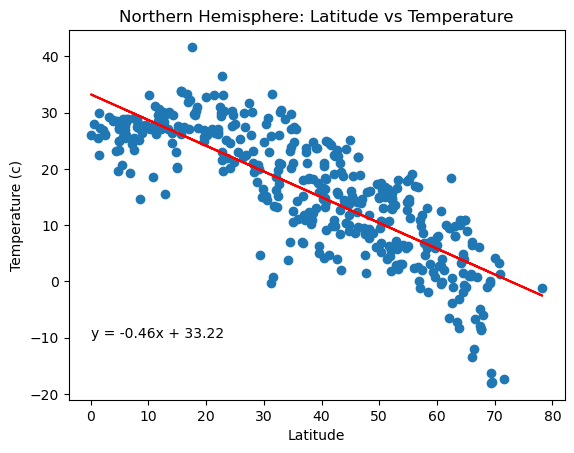

In [65]:
# Linear regression on Northern Hemisphere
nh_x_axis = northern_hemi_df['Lat']
nh_y_axis = northern_hemi_df['Max Temp']
plt.scatter(nh_x_axis,nh_y_axis)

plt.xlabel('Latitude')
plt.ylabel('Temperature (c)')
plt.title('Northern Hemisphere: Latitude vs Temperature')

(nh_slope,nh_int,nh_r,nh_p,nh_stderr)=linregress(nh_x_axis,nh_y_axis)
regress_values = nh_x_axis*nh_slope + nh_int
line_eq='y = ' + str(round(nh_slope,2)) + 'x + ' + str(round(nh_int,2))

plt.plot(nh_x_axis,regress_values,color='r')
plt.annotate(line_eq,(0,-10))

print(f'R Vaule: {nh_r}')
      
plt.show()

R Vaule: 0.782400145241219


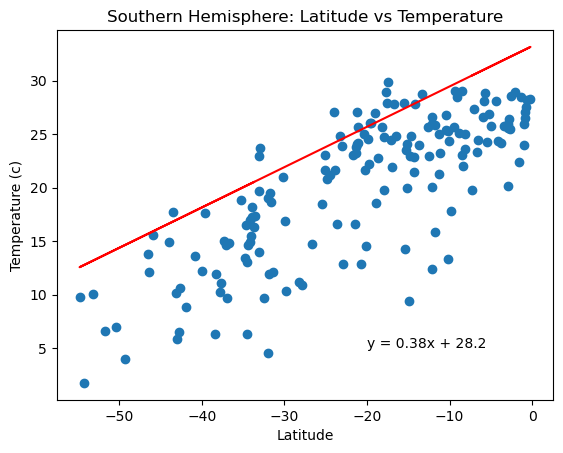

In [66]:
# Linear regression on Southern Hemisphere
sh_x_axis = southern_hemi_df['Lat']
sh_y_axis = southern_hemi_df['Max Temp']
plt.scatter(sh_x_axis,sh_y_axis)

plt.xlabel('Latitude')
plt.ylabel('Temperature (c)')
plt.title('Southern Hemisphere: Latitude vs Temperature')

(sh_slope,sh_int,sh_r,sh_p,sh_stderr)=linregress(sh_x_axis,sh_y_axis)
regress_values = sh_x_axis*sh_slope + nh_int
line_eq='y = ' + str(round(sh_slope,2)) + 'x + ' + str(round(sh_int,2))

plt.plot(sh_x_axis,regress_values,color='r')
plt.annotate(line_eq,(-20,5))

print(f'R Vaule: {sh_r}')
      
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R Vaule: 0.07502762225707528


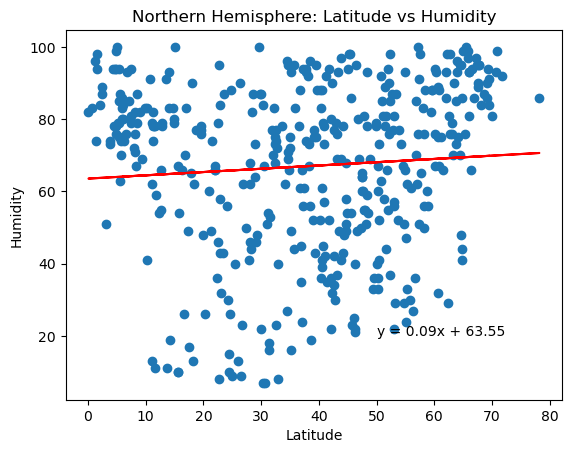

In [68]:
# Northern Hemisphere
nh_x_axis = northern_hemi_df['Lat']
nh_y_axis = northern_hemi_df['Humidity']
plt.scatter(nh_x_axis,nh_y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Latitude vs Humidity')

(nh_slope,nh_int,nh_r,nh_p,nh_stderr)=linregress(nh_x_axis,nh_y_axis)
regress_values = nh_x_axis*nh_slope + nh_int
line_eq='y = ' + str(round(nh_slope,2)) + 'x + ' + str(round(nh_int,2))

plt.plot(nh_x_axis,regress_values,color='r')
plt.annotate(line_eq,(50,20))

print(f'R Vaule: {nh_r}')
      
plt.show()

R Vaule: 0.1504999925399549


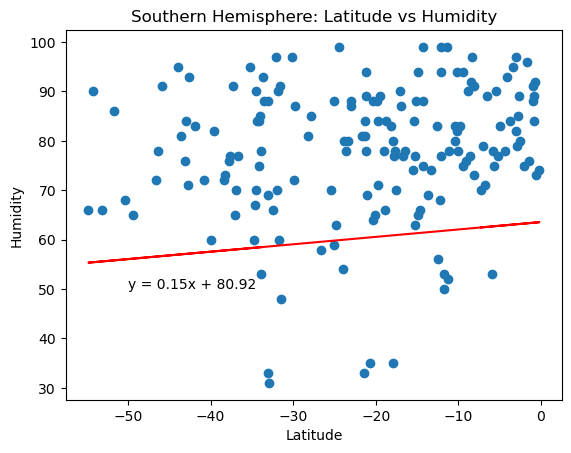

In [70]:
# Southern Hemisphere
sh_x_axis = southern_hemi_df['Lat']
sh_y_axis = southern_hemi_df['Humidity']
plt.scatter(sh_x_axis,sh_y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Latitude vs Humidity')

(sh_slope,sh_int,sh_r,sh_p,sh_stderr)=linregress(sh_x_axis,sh_y_axis)
regress_values = sh_x_axis*sh_slope + nh_int
line_eq='y = ' + str(round(sh_slope,2)) + 'x + ' + str(round(sh_int,2))

plt.plot(sh_x_axis,regress_values,color='r')
plt.annotate(line_eq,(-50,50))

print(f'R Vaule: {sh_r}')
      
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R Vaule: 0.062057098373020154


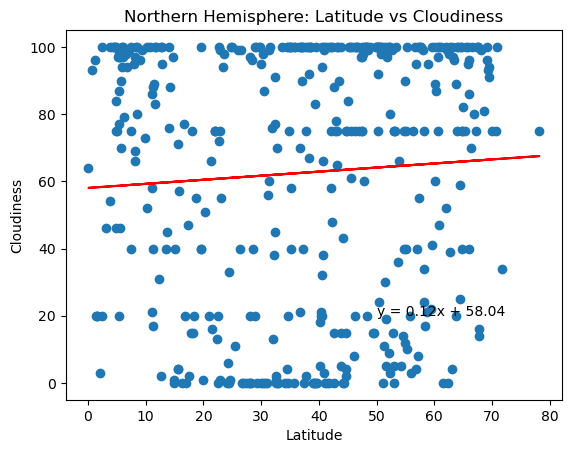

In [71]:
# Northern Hemisphere
nh_x_axis = northern_hemi_df['Lat']
nh_y_axis = northern_hemi_df['Cloudiness']
plt.scatter(nh_x_axis,nh_y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Latitude vs Cloudiness')

(nh_slope,nh_int,nh_r,nh_p,nh_stderr)=linregress(nh_x_axis,nh_y_axis)
regress_values = nh_x_axis*nh_slope + nh_int
line_eq='y = ' + str(round(nh_slope,2)) + 'x + ' + str(round(nh_int,2))

plt.plot(nh_x_axis,regress_values,color='r')
plt.annotate(line_eq,(50,20))

print(f'R Vaule: {nh_r}')
      
plt.show()

R Vaule: -0.04824367715173854


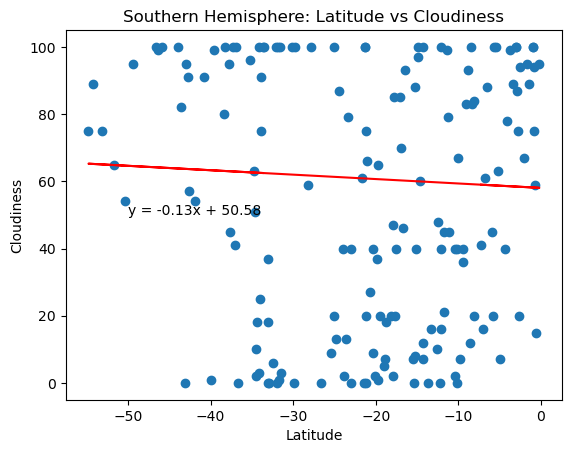

In [72]:
# Southern Hemisphere
sh_x_axis = southern_hemi_df['Lat']
sh_y_axis = southern_hemi_df['Cloudiness']
plt.scatter(sh_x_axis,sh_y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Latitude vs Cloudiness')

(sh_slope,sh_int,sh_r,sh_p,sh_stderr)=linregress(sh_x_axis,sh_y_axis)
regress_values = sh_x_axis*sh_slope + nh_int
line_eq='y = ' + str(round(sh_slope,2)) + 'x + ' + str(round(sh_int,2))

plt.plot(sh_x_axis,regress_values,color='r')
plt.annotate(line_eq,(-50,50))

print(f'R Vaule: {sh_r}')
      
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R Vaule: -0.043317592054707754


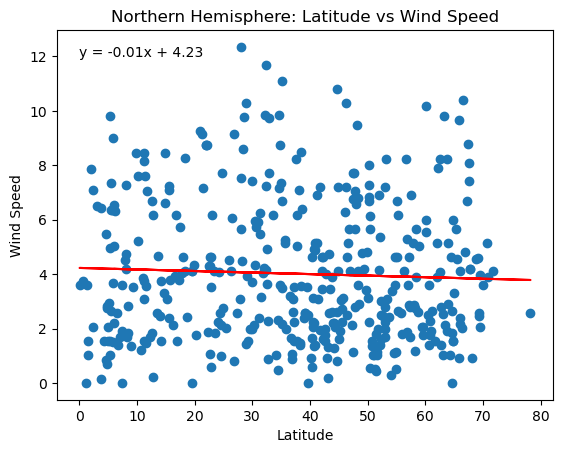

In [77]:
# Northern Hemisphere
nh_x_axis = northern_hemi_df['Lat']
nh_y_axis = northern_hemi_df['Wind Speed']
plt.scatter(nh_x_axis,nh_y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Latitude vs Wind Speed')

(nh_slope,nh_int,nh_r,nh_p,nh_stderr)=linregress(nh_x_axis,nh_y_axis)
regress_values = nh_x_axis*nh_slope + nh_int
line_eq='y = ' + str(round(nh_slope,2)) + 'x + ' + str(round(nh_int,2))

plt.plot(nh_x_axis,regress_values,color='r')
plt.annotate(line_eq,(0,12))

print(f'R Vaule: {nh_r}')
      
plt.show()

R Vaule: -0.12556795691183412


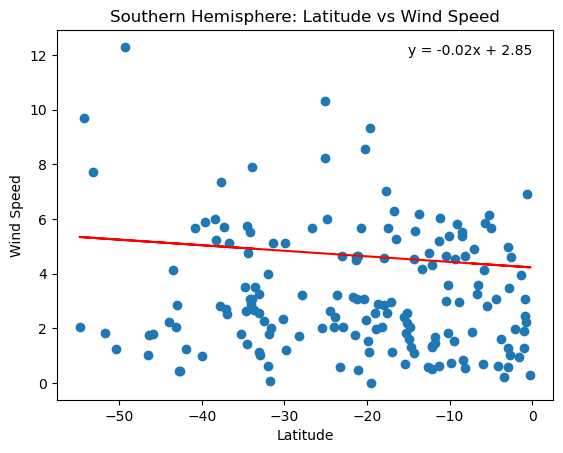

In [79]:
# Southern Hemisphere
sh_x_axis = southern_hemi_df['Lat']
sh_y_axis = southern_hemi_df['Wind Speed']
plt.scatter(sh_x_axis,sh_y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Latitude vs Wind Speed')

(sh_slope,sh_int,sh_r,sh_p,sh_stderr)=linregress(sh_x_axis,sh_y_axis)
regress_values = sh_x_axis*sh_slope + nh_int
line_eq='y = ' + str(round(sh_slope,2)) + 'x + ' + str(round(sh_int,2))

plt.plot(sh_x_axis,regress_values,color='r')
plt.annotate(line_eq,(-15,12))

print(f'R Vaule: {sh_r}')
      
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE